In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('mean.csv') as file:
    mean = [list(map(int, s.strip().split(","))) for s in file.readlines()]

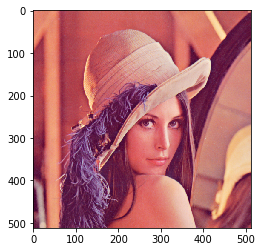

In [3]:
img = cv2.imread('Lenna.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [4]:
vsize, hsize = 8, 8  # 分割後の各セルのサイズ
h, w = img.shape[:2]  # 画像の大きさ
num_vsplits, num_hsplits = np.floor_divide([h, w], [vsize, hsize])  # 分割数
crop_img = img[:num_vsplits * vsize, :num_hsplits * hsize]

In [5]:
out_imgs = []
for h_img in np.vsplit(crop_img, num_vsplits):  # 垂直方向に分割する。
    for v_img in np.hsplit(h_img, num_hsplits):  # 水平方向に分割する。
        out_imgs.append(v_img)

(8, 8, 3)
4096


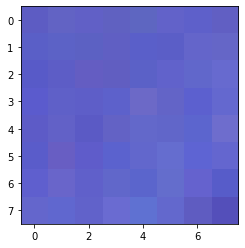

In [6]:
print(out_imgs[0].shape)
print(len(out_imgs))
plt.imshow(cv2.cvtColor(out_imgs[125], cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
anslist=[]
for i in out_imgs:
    r, g, b = cv2.split(i)
    rmean = int(r.mean())
    gmean = int(g.mean())
    bmean = int(b.mean())
    count = 114514
    ans = 0
    for x, j in enumerate(mean):
        if count > abs(j[0]-rmean)+abs(j[1]-gmean)+abs(j[2]-bmean):
            count = abs(j[0]-rmean)+abs(j[1]-gmean)+abs(j[2]-bmean)
            ans = x
    anslist.append(ans)
print(anslist)
    
#        count = min(count, abs(j[0]-rmean)+abs(j[1]-gmean)+abs(j[2]-bmean))
    #print(ans)    
    

[28442, 28442, 32264, 32264, 32264, 2006, 2006, 5421, 32168, 10101, 12079, 12079, 12079, 12079, 22798, 5421, 5421, 5421, 5421, 5421, 5421, 5421, 5421, 5421, 5421, 5421, 20037, 5421, 5421, 5421, 5421, 5421, 5421, 5421, 5421, 5421, 5421, 5421, 41508, 12079, 22798, 17924, 32264, 32264, 32264, 32264, 32264, 32264, 32264, 32264, 2006, 32325, 33984, 10101, 12079, 38819, 20037, 22798, 22798, 22798, 20037, 22798, 12079, 23276, 32264, 32264, 32264, 32264, 32264, 2006, 2006, 5421, 32168, 14965, 14965, 14965, 14965, 12079, 12079, 5421, 5421, 5421, 5421, 5421, 5421, 5421, 5421, 5421, 5421, 5421, 5421, 5421, 5421, 5421, 5421, 5421, 5421, 5421, 5421, 5421, 5421, 5421, 38819, 12079, 12079, 23276, 28442, 32264, 32264, 32264, 32264, 32264, 32264, 32264, 32264, 49914, 32325, 31843, 12079, 38819, 22798, 22798, 22798, 22798, 22798, 41508, 32168, 28938, 32264, 32264, 32264, 32264, 2006, 2006, 32264, 5421, 32168, 14965, 14965, 14965, 14965, 12079, 12079, 5421, 5421, 5421, 5421, 5421, 5421, 5421, 5421, 5421,

In [8]:
import keras
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

Using TensorFlow backend.


(2048, 2080, 3)


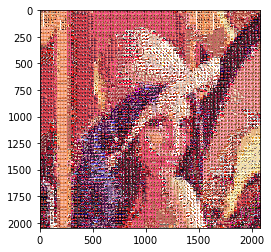

True

In [9]:
#vimg = x_train[anslist[0]]
for i in range(num_vsplits):#一行目の画像
    if i==0:#初回だけ直接入れる
        vimg = x_train[anslist[0]]
    vimg = cv2.hconcat([vimg, x_train[anslist[i]]])#二回めから横結合
for i in range(1, num_hsplits):#二行目以降の画像
    for j in range(num_vsplits):
        if j==0:
            vimg2 = x_train[anslist[i*num_vsplits]]
        vimg2 = cv2.hconcat([vimg2, x_train[anslist[i*num_vsplits+j]]])#横結合
    vimg = cv2.vconcat([vimg, vimg2])#縦結合
#for i, j in enumerate(anslist[1:]):
#    vimg = np.hstack((vimg, x_train[j]))
#vimg=np.reshape(vimg, (hsize, vsize*num_vsplits, num_hsplits, 3))#vsize*num_vsplits, hsize*num_hsplits, 3)
        
#vimg=np.reshape(vimg, (vsize*num_vsplits, hsize*num_hsplits, 3))
#    if i+1%num_vsplits == 0:

print(vimg.shape)
    
plt.imshow(vimg)
plt.show()
vimg = cv2.cvtColor(vimg, cv2.COLOR_RGB2BGR)
cv2.imwrite('mosaic.jpg', vimg)